# 01. Data Analytics Part

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as data
%matplotlib inline

In [3]:
df = pd.read_csv('transit-ridership.csv') #First read all the data from the csv file
df= df.rename(columns={'Unnamed: 0': 'Year'}) #Rename the unnamed column title to 'Year'
for i in df.columns: #for each column
    df[i] = df[i].replace(",", "", regex=True) #remove all the commas in between each values
df = df._convert(numeric=True) #convert the elements to numeric values

In [4]:
#Eliminating null values 
#To do so, if we find a null, we are going to replace them with the mean of the column
df = df[:-1]
count = 1997
total = len(df[i])
for i in df.columns:
    if i == 'Year':
        df[i] = np.array([x for x in range(count,count+total)])
        
    else:
        a = int(df[i].mean()) #replace all the NaN with the mean value of the column 
        df[i] = df[i].fillna(a) #populate the NaN ones with the mean

df #JUST FOR CHECKING

,Year,July,October,December,February,Total
0,1997,287136,1052714,807508,1157678,9501302.0
1,1998,289269,1142300,753231,982453,8670906.0
2,1999,281914,1055683,673696,1006772,8628101.0
3,2000,297848,1060153,650067,1091131,8800655.0
4,2001,270213,1085119,825356,1159928,10102665.0
5,2002,286552,1227976,524747,1118989,9084277.0
6,2003,311041,1169216,787201,1133363,9369218.0
7,2004,338494,1305943,813161,1154057,10435923.0
8,2005,341083,1217625,739941,1200637,10136585.0
9,2006,289169,1135129,736504,1167974,9958497.0


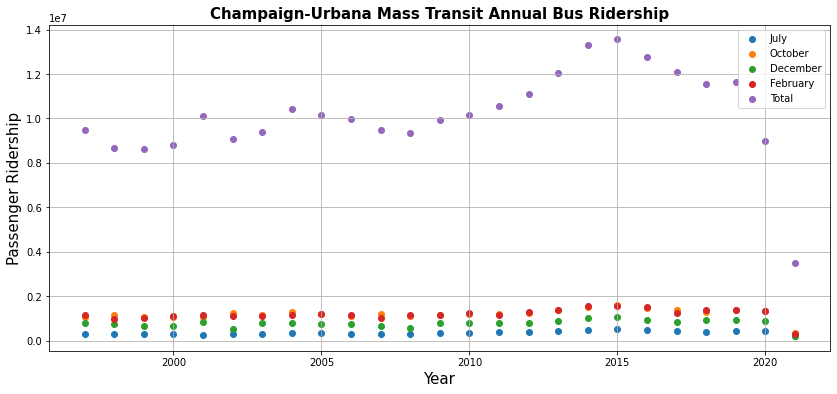

In [5]:
#### Now we are going to plot the graph using matplotlib to visualize our data input
x = df['Year'] #x-axis is going to be our year
figure = plt.figure(figsize=(14,6)) #adjust the figure size
plt.title('Champaign-Urbana Mass Transit Annual Bus Ridership',fontweight='bold',fontsize=15) #add the title
plt.grid() #add the grid
plt.xlabel('Year',fontsize=15) #add the x-axis label
plt.ylabel('Passenger Ridership',fontsize=15) #add the y-axis label
temp = df.drop('Year',axis=1) #Just drop the year column because we are not going to use that for our data analytics
for i in temp.columns: #Now for each column in our python dataframe column
    plt.scatter(x,temp[i]) #I want to keep plotting
    
plt.legend(temp) #Don't forget to add the legend

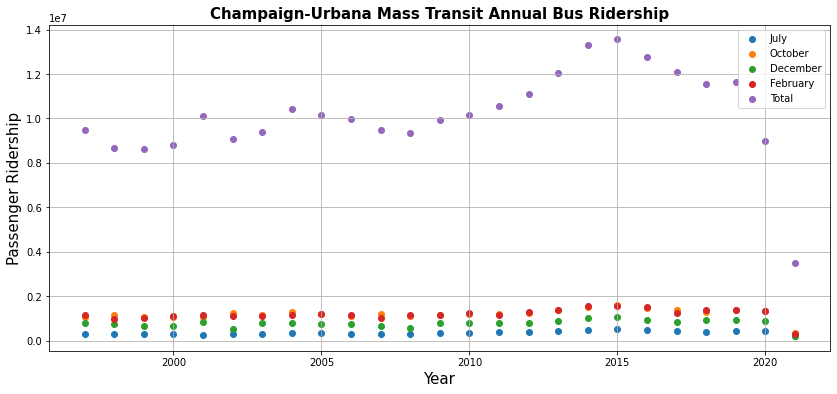

In [6]:
figure

In [6]:
finalized = temp #we will be analyzing the basic statistics using this dataframe

#########Ridership Analysis in further detail
for i in finalized.columns:
    print('Maximum ridership for',i,'is',finalized[i].max())
    print('Minimum ridership for',i,'is',finalized[i].min())
    print('Mean ridership for',i,'is',int(finalized[i].mean()))
    print('Range for',i,'is',int(finalized[i].max() - finalized[i].min()))
    print()

Maximum ridership for July is 524178
Minimum ridership for July is 226004
Mean ridership for July is 357476
Range for July is 298174

Maximum ridership for October is 1606340
Minimum ridership for October is 343765
Mean ridership for October is 1215791
Range for October is 1262575

Maximum ridership for December is 1068610
Minimum ridership for December is 214183
Mean ridership for December is 776879
Range for December is 854427

Maximum ridership for February is 1582330
Minimum ridership for February is 318071
Mean ridership for February is 1198200
Range for February is 1264259

Maximum ridership for Total is 13551784.0
Minimum ridership for Total is 3480360.0
Mean ridership for Total is 10183726
Range for Total is 10071424



# 02. Machine Learning Dataset Training Part

In [7]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [8]:
#LSTM Prediction Model
df = df.sort_index(ascending=True,axis=0)

data1 = pd.DataFrame(index=range(0,len(df)),columns=['Year','Total'])
for i in range(0,len(data1)):
    data1["Year"][i]=df['Year'][i]
    data1['Total'][i]=df['Total'][i]
data1.head()


,Year,Total
0,1997,9501302.0
1,1998,8670906.0
2,1999,8628101.0
3,2000,8800655.0
4,2001,10102665.0


In [9]:
#Min Max Scaler
scaler1 = MinMaxScaler(feature_range=(0,1))
data1.index= data1.Year
data1.drop('Year',axis=1,inplace=True)

final_data1 = data1.values

a = 20

train_data1 = final_data1[0:a,:]
valid_data1 = final_data1[a:,:]
print(len(train_data1))
scaler1 = MinMaxScaler(feature_range=(0,1))

scaled_data1 = scaler1.fit_transform(final_data1)

x1_train_data = []
y1_train_data = []

lower = 4
for i in range(lower,len(train_data1)):
    x1_train_data.append(scaled_data1[i-lower:i,0])
    y1_train_data.append(scaled_data1[i,0])
    

x1_train_data = np.array(x1_train_data)
y1_train_data = np.array(y1_train_data)

20


In [10]:
#LSTM Model
lstm_model1 = Sequential()
lstm_model1.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x1_train_data)[1],1)))
lstm_model1.add(LSTM(units=50))
lstm_model1.add(Dense(1))

model_data1 = data1[len(data1)-len(valid_data1)-lower:].values
model_data1 = model_data1.reshape(-1,1)
model_data1 = scaler1.transform(model_data1)
model_data1

array([[0.84871931],
       [0.97592674],
       [1.        ],
       [0.92242765],
       [0.85575615],
       [0.79909504],
       [0.80910137],
       [0.5448311 ],
       [0.        ]])

In [11]:
#Train and Test Data
lstm_model1.compile(loss='mean_squared_error',optimizer='adam')

lstm_model1.fit(x1_train_data,y1_train_data,epochs=1,batch_size=1,verbose=2)

X1_test=[]

for i in range(lower,model_data1.shape[0]):
    X1_test.append(model_data1[i-lower:i,0])
    

X1_test = np.array(X1_test)
X1_test = np.reshape(X1_test,(X1_test.shape[0],X1_test.shape[1],1))


16/16 - 3s - loss: 0.3105 - 3s/epoch - 179ms/step


# 03. Time Series Analysis and Traffic Trend Predictions

In [12]:
predicted_july = lstm_model1.predict(X1_test)
predicted_july = scaler1.inverse_transform(predicted_july)

1/1 [==============================] - 1s 803ms/step


<ipython-input-32-17f8ef6bedcf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data1['Predictions'] = predicted_july


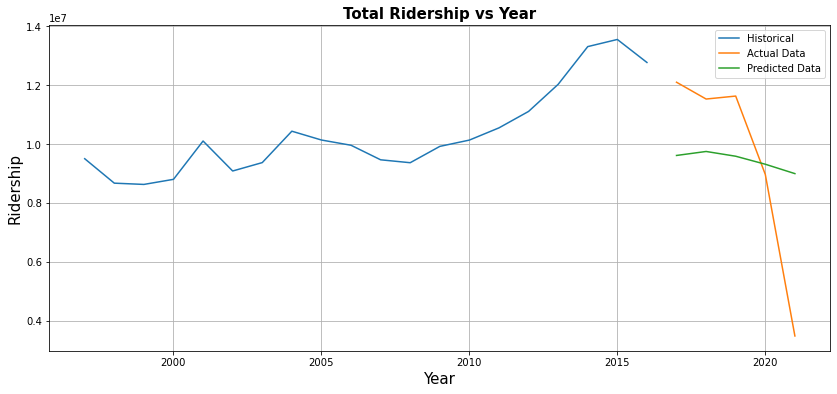

In [32]:
train_data1 = data1[:a]
valid_data1= data1[a:]
valid_data1['Predictions'] = predicted_july
plt.figure(figsize=(14,6))
plt.grid()
xx = df['Year']
plt.xlabel('Year',fontsize=15)
plt.ylabel('Ridership',fontsize=15)
plt.title('Total Ridership vs Year',fontweight='bold',fontsize=15)



plt.plot(xx[:-5],train_data1['Total'],label='Historical')
plt.plot(xx[20:],valid_data1[['Total',"Predictions"][0]],label='Actual Data')
plt.plot(xx[20:],valid_data1[['Total',"Predictions"][1]],label='Predicted Data')


plt.legend()
plt.show()